## Entendimiento y preparación de datos C1 y C8
### Notebook 1

#### Tesis Análisis, predicción y visualización de datos
Benjamin Reyes - Pablo Pastrana

In [320]:
# Carga de librerías a utilizar

# Librería para comandos del sistema
import os

# Librerías para manejo de datos
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import joblib

# Librerías de aprendizaje automático.

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline

## 1. Entendimiento de los datos

### 1.1 Carga de datos

In [321]:
# Se cargan los datasets

data_c1 = pd.read_csv('./data/ENUT_C1.csv', sep=',', encoding = 'utf-8')
data_c3 = pd.read_csv('./data/ENUT_C3.csv', sep=',', encoding = 'utf-8')
data_c8 = pd.read_csv('./data/ENUT_C8.csv', sep=',', encoding = 'utf-8')


### 1.2 Visualización de los datos

In [322]:
# Cantidad de datos y número de variables C1
data_c1.shape

(49051, 15)

In [323]:
# Cantidad de datos y número de variables C3
data_c3.shape

(147579, 40)

In [324]:
# Cantidad de datos y número de variables C8
data_c8.shape

(126753, 399)

In [325]:
# Se visualiza las primeras 5 columnas de ENUT C1
data_c1.head()


,DIRECTORIO,P424,P4030S1,P4030S1A1,P4030S5,P4030S3,P4030S4,P4030S4A1,P4030S6,P4030S2,MES_REF,DIA_REF,CLASE,REGION,F_EXP_VIV
0,3,2,1,4.0,1,1,1,3.0,1,1,9,5,1,2,239.883220
1,7,1,1,2.0,1,1,1,3.0,1,1,9,6,2,2,274.641682
2,11,2,1,2.0,1,1,1,2.0,1,1,9,4,2,2,478.663999
3,14,1,1,1.0,1,1,2,NaN,2,1,9,6,1,1,124.680583
4,17,1,1,2.0,1,1,1,3.0,1,1,9,6,1,1,184.098370


In [326]:
# Se visualiza las primeras 5 columnas de ENUT C3
data_c3.head()


,DIRECTORIO,SECUENCIA_P,ORDEN,P6040,P6020,P425,P1174,P1174S,P1174S1A,P1174S2A,...,P1181S,P1181S1A,P1181S2A,P1181S3A,P1182,P1182S,P1182S1A,P1182S2A,P1182S3A,F_EXP
0,3,1,1,76,1,1,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
1,3,1,2,69,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
2,7,1,1,56,2,1,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,274.641682
3,7,1,2,22,1,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1,3,31,1,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


In [327]:
# Se visualiza las primeras 5 columnas de ENUT C8
data_c8.head()

,DIRECTORIO,SECUENCIA_P,ORDEN,P1144S1,P1144S1A1,P1144S1A2,P1144S2,P1144S2A1,P1144S2A2,P1144S3,...,P1120S7,P1120S8,P1183S1,P1183S2,P1183S3,P1183S4,P1183S5,P1183S6,P1183S7,F_EXP
0,3,1,1,1.0,8.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,1.0,1.0,2.0,2.0,2.0,239.883220
1,3,1,2,1.0,7.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,239.883220
2,7,1,1,1.0,8.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
3,7,1,2,1.0,9.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1,3,1.0,9.0,0.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


In [328]:
# Se obtiene el número de valores únicos en la columna DIRECTORIO en C1
data_c1['DIRECTORIO'].nunique()

49051

In [329]:
# Se obtiene el número de valores únicos en la columna DIRECTORIO en C1
data_c3['DIRECTORIO'].nunique()

49051

In [330]:
# Se obtiene el número de valores únicos en la columna DIRECTORIO en C8
data_c8['DIRECTORIO'].nunique()

49051

Observamos que todos los datasets tienen la misma cantidad de valores únicos en la columna DIRECTORIO, lo que rectifica que este es el número de ID único y, por lo tanto, será la variable con la que podemos juntar las tablas.

## 2. Preparación de datos

### 2.1 Ajuste de nombres de columnas y variables

Lo primero que hacemos es sustituir los valores de referencia asignados a las columnas y las variables por nombres más comprensibles. 

In [331]:
# Cambio de nombre de las columnas para C1

data_c1.columns = pd.read_csv('./data/Nombres_columnas_C1.csv', sep=';', encoding = 'utf-8').columns
data_c1.head()

,id,tipoVivienda,energiaElectrica,estratoTarifa,acueducto,alcantarillado,recoleccionBasuras,diasSemana,Internet,gasNatural,mes,dia,urbanoORural,region,factorExpansion
0,3,2,1,4.0,1,1,1,3.0,1,1,9,5,1,2,239.883220
1,7,1,1,2.0,1,1,1,3.0,1,1,9,6,2,2,274.641682
2,11,2,1,2.0,1,1,1,2.0,1,1,9,4,2,2,478.663999
3,14,1,1,1.0,1,1,2,NaN,2,1,9,6,1,1,124.680583
4,17,1,1,2.0,1,1,1,3.0,1,1,9,6,1,1,184.098370


In [332]:
# Cambio de nombre de las columnas para C3

data_c3.columns = pd.read_csv('./data/Nombres_columnas_C3.csv', sep=';', encoding = 'utf-8').columns
data_c3.head()

,id,secuenciaP,orden,edad,sexo,parentescoJefatura,comparteJefatura,cuantas,numOrden,numOrden.1,...,cuantasPersonas.1,numOrden.10,numOrden.11,numOrden.12,decisionesVenta,cuantasPersonas.2,numOrden.13,numOrden.14,numOrden.15,factorExpansion
0,3,1,1,76,1,1,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
1,3,1,2,69,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
2,7,1,1,56,2,1,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,274.641682
3,7,1,2,22,1,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1,3,31,1,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


In [333]:
# Cambio de nombre de las columnas para C8  (desabilitado por solución alternativa de solo cambiar el nombre de las columnas utilizadas)

# data_c8.columns = pd.read_csv('./data/Nombres_columnas_C8.csv', sep=';', encoding = 'utf-8').columns
data_c8.head()

,DIRECTORIO,SECUENCIA_P,ORDEN,P1144S1,P1144S1A1,P1144S1A2,P1144S2,P1144S2A1,P1144S2A2,P1144S3,...,P1120S7,P1120S8,P1183S1,P1183S2,P1183S3,P1183S4,P1183S5,P1183S6,P1183S7,F_EXP
0,3,1,1,1.0,8.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,1.0,1.0,2.0,2.0,2.0,239.883220
1,3,1,2,1.0,7.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,239.883220
2,7,1,1,1.0,8.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
3,7,1,2,1.0,9.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1,3,1.0,9.0,0.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


In [334]:
# Se sustituyen los nombres de referencia de las variables por nombres descriptivos con una función

variables_c1 = pd.read_csv('./data/Nombres_Variables_C1.csv', sep=',', encoding = 'utf-8')
variables_c3 = pd.read_csv('./data/Nombres_Variables_C3.csv', sep=',', encoding = 'utf-8')
variables_c8 = pd.read_csv('./data/Nombres_Variables_C8.csv', sep=',', encoding = 'utf-8')

def update_df_with_labels(df, mapping_df):
    # Itera sobre el mapa buscando "_valor"
    for col in mapping_df.columns:
        if '_valor' in col:
            # Saca el nombre de la columna sin '_valor'
            original_col = col.replace('_valor', '')
            # Revisa si la columna existe en el df original
            if original_col in df.columns:
                # Crea un mapa con el codigo numerico
                # Abandona valores NA
                mapping_series = mapping_df.dropna(subset=[original_col, col]).set_index(original_col)[col]
                mapping_dict = mapping_series.to_dict()
                # Actualiza el df en base al mapa
                df[original_col] = df[original_col].map(mapping_dict).fillna(df[original_col])
    return df

In [335]:
# Se cambia el nombre de los valores para C1 usando la función update_df_with_labels
data_c1 = update_df_with_labels(data_c1, variables_c1)

# Se asegura de que id es un número entero
data_c1['id'] = data_c1['id'].astype(int)

# Se asegura de que estratoTarifa es un número entero
data_c1['estratoTarifa'] = data_c1['estratoTarifa'].astype(float).fillna(0).astype(int)

data_c1.head()

,id,tipoVivienda,energiaElectrica,estratoTarifa,acueducto,alcantarillado,recoleccionBasuras,diasSemana,Internet,gasNatural,mes,dia,urbanoORural,region,factorExpansion
0,3,apartamento,si,4,si,si,si,3.0,si,si,9.0,5.0,urbano,central,239.883220
1,7,casa,si,2,si,si,si,3.0,si,si,9.0,6.0,rural,central,274.641682
2,11,apartamento,si,2,si,si,si,2.0,si,si,9.0,4.0,rural,central,478.663999
3,14,casa,si,1,si,si,no,NaN,no,si,9.0,6.0,urbano,caribe,124.680583
4,17,casa,si,2,si,si,si,3.0,si,si,9.0,6.0,urbano,caribe,184.098370


In [336]:
# Se cambia el nombre de los valores para C3 usando la función update_df_with_labels
data_c3 = update_df_with_labels(data_c3, variables_c3)

# Se asegura de que id es un número entero
data_c3['id'] = data_c3['id'].astype(int)

data_c3.head()

,id,secuenciaP,orden,edad,sexo,parentescoJefatura,comparteJefatura,cuantas,numOrden,numOrden.1,...,cuantasPersonas.1,numOrden.10,numOrden.11,numOrden.12,decisionesVenta,cuantasPersonas.2,numOrden.13,numOrden.14,numOrden.15,factorExpansion
0,3,1.0,1.0,76.0,hombre,jefe/a del hogar,si,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
1,3,1.0,2.0,69.0,mujer,esposo/a o companero/a,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.883220
2,7,1.0,1.0,56.0,mujer,jefe/a del hogar,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,274.641682
3,7,1.0,2.0,22.0,hombre,"hijo/a, hijastro/a",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1.0,3.0,31.0,hombre,"hijo/a, hijastro/a",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


In [337]:
# Se cambia el nombre de los valores para C8 usando la función update_df_with_labels
data_c8 = update_df_with_labels(data_c8, variables_c8)

# Se asegura de que id es un número entero
data_c8['DIRECTORIO'] = data_c8['DIRECTORIO'].astype(int)

data_c8.head()

,DIRECTORIO,SECUENCIA_P,ORDEN,P1144S1,P1144S1A1,P1144S1A2,P1144S2,P1144S2A1,P1144S2A2,P1144S3,...,P1120S7,P1120S8,P1183S1,P1183S2,P1183S3,P1183S4,P1183S5,P1183S6,P1183S7,F_EXP
0,3,1,1,1.0,8.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,1.0,1.0,2.0,2.0,2.0,239.883220
1,3,1,2,1.0,7.0,0.0,1.0,1.0,0.0,1.0,...,2,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,239.883220
2,7,1,1,1.0,8.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
3,7,1,2,1.0,9.0,30.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682
4,7,1,3,1.0,9.0,0.0,1.0,1.0,0.0,1.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.641682


### 2.2 Eliminación de respuestas erróneas

La única pregunta de interés que parece tener respuestas fuera del rango permitido es la de estratoTarifa, puesto que solo existen los estratos 1-6, pero hay algunas respuestas que se salen de este rango. 

In [338]:
# Se validan los valores incorrectos que existen

data_c1['estratoTarifa'].value_counts()

1    17937
2    16028
3     9546
4     3015
5     1216
6      673
0      454
8      127
9       55
Name: estratoTarifa, dtype: int64

In [339]:
# Ya que los valores incorrectos son pocos, se procede a ponerles el rótulo "No sabe"

data_c1['estratoTarifa'] = data_c1['estratoTarifa'].replace([8, 9, 0], 'No sabe')

data_c1['estratoTarifa'].value_counts()

1          17937
2          16028
3           9546
4           3015
5           1216
6            673
No sabe      636
Name: estratoTarifa, dtype: int64

### 2.3 Transformación de variable númerica a categórica

In [340]:
# Se crean rangos etarios para poder transformar la variable númerica edad en categorias manejables

for i in range(len(data_c3)):

    if data_c3['edad'][i] <= 5:
        data_c3['edad'][i] = '0-5'
    elif data_c3['edad'][i] <= 11:
        data_c3['edad'][i] = '6-11'
    elif data_c3['edad'][i] <= 18:
        data_c3['edad'][i] = '12-18'
    elif data_c3['edad'][i] <= 30:
        data_c3['edad'][i] = '19-30'
    elif data_c3['edad'][i] <= 60:
        data_c3['edad'][i] = '31-60'
    elif data_c3['edad'][i] <= 80:
        data_c3['edad'][i] = '61-80'
    else:
        data_c3['edad'][i] = '81+'

data_c3['edad'].value_counts()

/var/folders/1j/4kvsqhq928q8fqfzs522_snm0000gq/T/ipykernel_3669/4137340599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c3['edad'][i] = '61-80'
/Users/palito/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


31-60    57344
19-30    28103
61-80    18795
12-18    15656
6-11     13449
0-5      11316
81+       2916
Name: edad, dtype: int64

### 2.4 Creación de dataframe con las preguntas relevantes para el proyecto

In [341]:
# Se crean dataframes depurados con valores de C1, C3 y C8

data_c1_depurada = pd.concat([data_c1['id'], data_c1['region'], data_c1['urbanoORural'], data_c1['estratoTarifa'], data_c1['Internet']], axis=1)
data_c3_depurada = pd.concat([data_c3['id'], data_c3['orden'], data_c3['edad'], data_c3['sexo'], data_c3['grupoEtnico']], axis=1)

# Se traen las columnas de horas y minutos correspondientes a las preguntas de interés
# Este es el único paso que debe hacerse manualmente. En nuestro caso las preguntas elegidas son: dormir, descansar sin hacer nada más, hacer deporte, 
# caminar, ir a bares o fiestas, conversar, navegar internet sin hacer nada más, navegar internet haciendo algo más, leer, tocar algún instrumento musical,
# escuchar música sin hacer nada más, escuchar música haciendo algo más, aconsejar o consolar a alguien, rezar o meditar, cuidar mascotas, cuidar plantas,
# sembrar plantas para el consumo del hogar, criar o cazar para el consumo, jugar con niños, leer cuentos con niños, llevar niños al parque y si le alcanza el tiempo 
data_c8_depurada = pd.concat([data_c8['DIRECTORIO'],data_c8['ORDEN'], data_c8['P1144S1A1'], data_c8['P1144S1A2'], data_c8['P1144S6A1'], data_c8['P1144S6A2'], 
                              data_c8['P1112S1A1'], data_c8['P1112S1A2'], data_c8['P1112S2A1'], data_c8['P1112S2A2'], data_c8['P1113S1A1'], 
                              data_c8['P1113S1A2'], data_c8['P1113S2A1'], data_c8['P1113S2A2'], data_c8['P1110S5A1'], data_c8['P1110S5A2'],
                              data_c8['P1110S6A1'], data_c8['P1110S6A2'], data_c8['P1110S8A1'], data_c8['P1110S8A2'], data_c8['P1111S3A1'],
                              data_c8['P1111S3A2'], data_c8['P1110S3A1'], data_c8['P1110S3A2'], data_c8['P1110S4A1'], data_c8['P1110S4A2'],
                              data_c8['P1114S1A1'], data_c8['P1114S1A2'], data_c8['P1111S4A1'], data_c8['P1111S4A2'], data_c8['P1136S2A1'],
                              data_c8['P1136S2A2'], data_c8['P1136S3A1'], data_c8['P1136S3A2'], data_c8['P1126S1A1'], data_c8['P1126S1A2'],
                              data_c8['P1126S2A1'], data_c8['P1126S2A2'], data_c8['P1137S1A1'], data_c8['P1137S1A2'], data_c8['P1137S2A1'],
                              data_c8['P1137S2A2'], data_c8['P1137S3A1'], data_c8['P1137S3A2'], data_c8['P1108']], axis=1)
data_c8_depurada

,DIRECTORIO,ORDEN,P1144S1A1,P1144S1A2,P1144S6A1,P1144S6A2,P1112S1A1,P1112S1A2,P1112S2A1,P1112S2A2,...,P1126S1A2,P1126S2A1,P1126S2A2,P1137S1A1,P1137S1A2,P1137S2A1,P1137S2A2,P1137S3A1,P1137S3A2,P1108
0,3,1,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,3,2,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,7,1,8.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,7,2,9.0,30.0,9.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,7,3,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126748,73884,2,9.0,0.0,NaN,NaN,2.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
126749,73884,3,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,20.0,NaN,NaN,2
126750,73884,4,7.0,0.0,NaN,NaN,2.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
126751,73884,6,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,0.0,0.0,20.0,NaN,NaN,2


In [342]:
# Se unifican las columnas de horas y minutos de cada actividad en una sola columna de horas

data_c8_depurada['dormir'] = data_c8_depurada['P1144S1A1'] + data_c8_depurada['P1144S1A2']/60
data_c8_depurada['descansar'] = data_c8_depurada['P1144S6A1'] + data_c8_depurada['P1144S6A2']/60
data_c8_depurada['deporte'] = data_c8_depurada['P1112S1A1'] + data_c8_depurada['P1112S1A2']/60
data_c8_depurada['caminar'] = data_c8_depurada['P1112S2A1'] + data_c8_depurada['P1112S2A2']/60
data_c8_depurada['baresOFiestas'] = data_c8_depurada['P1113S1A1'] + data_c8_depurada['P1113S1A2']/60
data_c8_depurada['conversar'] = data_c8_depurada['P1113S2A1'] + data_c8_depurada['P1113S2A2']/60
data_c8_depurada['internet'] = data_c8_depurada['P1110S5A1'] + data_c8_depurada['P1110S5A2']/60
data_c8_depurada['internetAlgoMas'] = data_c8_depurada['P1110S6A1'] + data_c8_depurada['P1110S6A2']/60
data_c8_depurada['leer'] = data_c8_depurada['P1110S8A1'] + data_c8_depurada['P1110S8A2']/60
data_c8_depurada['instrumento'] = data_c8_depurada['P1111S3A1'] + data_c8_depurada['P1111S3A2']/60
data_c8_depurada['musica'] = data_c8_depurada['P1110S3A1'] + data_c8_depurada['P1110S3A2']/60
data_c8_depurada['musicaAlgoMas'] = data_c8_depurada['P1110S4A1'] + data_c8_depurada['P1110S4A2']/60
data_c8_depurada['aconsejar'] = data_c8_depurada['P1114S1A1'] + data_c8_depurada['P1114S1A2']/60
data_c8_depurada['rezarOMeditar'] = data_c8_depurada['P1111S4A1'] + data_c8_depurada['P1111S4A2']/60
data_c8_depurada['cuidarMascotas'] = data_c8_depurada['P1136S2A1'] + data_c8_depurada['P1136S2A2']/60
data_c8_depurada['cuidarPlantas'] = data_c8_depurada['P1136S3A1'] + data_c8_depurada['P1136S3A2']/60
data_c8_depurada['sembrarConsumo'] = data_c8_depurada['P1126S1A1'] + data_c8_depurada['P1126S1A2']/60
data_c8_depurada['criarOCazar'] = data_c8_depurada['P1126S2A1'] + data_c8_depurada['P1126S2A2']/60
data_c8_depurada['jugarNino'] = data_c8_depurada['P1137S1A1'] + data_c8_depurada['P1137S1A2']/60
data_c8_depurada['cuentosNino'] = data_c8_depurada['P1137S2A1'] + data_c8_depurada['P1137S2A2']/60
data_c8_depurada['parqueNino'] = data_c8_depurada['P1137S3A1'] + data_c8_depurada['P1137S3A2']/60
data_c8_depurada['alcanzaTiempo'] = data_c8_depurada['P1108']


# Se eliminan las columnas de minutos y horas que ya no son necesarias

data_c8_depurada.drop(['P1144S1A1', 'P1144S1A2', 'P1144S6A1', 'P1144S6A2', 'P1112S1A1', 'P1112S1A2', 
                          'P1112S2A1', 'P1112S2A2', 'P1113S1A1', 'P1113S1A2', 'P1113S2A1', 'P1113S2A2', 
                          'P1110S5A1', 'P1110S5A2', 'P1110S6A1', 'P1110S6A2', 'P1110S8A1', 'P1110S8A2', 
                          'P1111S3A1', 'P1111S3A2', 'P1110S3A1', 'P1110S3A2', 'P1110S4A1', 'P1110S4A2', 
                          'P1114S1A1', 'P1114S1A2', 'P1111S4A1', 'P1111S4A2', 'P1136S2A1', 'P1136S2A2', 
                          'P1136S3A1', 'P1136S3A2', 'P1126S1A1', 'P1126S1A2', 'P1126S2A1', 'P1126S2A2', 
                          'P1137S1A1', 'P1137S1A2', 'P1137S2A1', 'P1137S2A2', 'P1137S3A1', 'P1137S3A2','P1108'], axis=1, inplace=True)

data_c8_depurada

,DIRECTORIO,ORDEN,dormir,descansar,deporte,caminar,baresOFiestas,conversar,internet,internetAlgoMas,...,aconsejar,rezarOMeditar,cuidarMascotas,cuidarPlantas,sembrarConsumo,criarOCazar,jugarNino,cuentosNino,parqueNino,alcanzaTiempo
0,3,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,3,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,7,1,8.5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,7,2,9.5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,7,3,9.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126748,73884,2,9.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
126749,73884,3,8.0,NaN,NaN,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.333333,NaN,2
126750,73884,4,7.0,NaN,2.0,NaN,NaN,2.0,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
126751,73884,6,9.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.333333,NaN,2


In [343]:
# Se unifican los dataframes depurados en un solo dataframe definitivo

data_depurada = pd.merge(data_c3_depurada, data_c1_depurada, on='id')

data_c8_depurada = data_c8_depurada.rename(columns={'DIRECTORIO': 'id'})
data_c8_depurada = data_c8_depurada.rename(columns={'ORDEN': 'orden'})
data_depurada = pd.merge(data_depurada, data_c8_depurada, on=['id','orden'])

data_depurada['orden'] = data_depurada['orden'].astype(int)
data_depurada['id'] = data_depurada['id'].astype(str) + '_' + data_depurada['orden'].astype(str)
data_depurada = data_depurada.drop(columns=['orden'])

data_depurada

,id,edad,sexo,grupoEtnico,region,urbanoORural,estratoTarifa,Internet,dormir,descansar,...,aconsejar,rezarOMeditar,cuidarMascotas,cuidarPlantas,sembrarConsumo,criarOCazar,jugarNino,cuentosNino,parqueNino,alcanzaTiempo
0,3_1,61-80,hombre,ninguna de las anteriores,central,urbano,4,si,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,3_2,61-80,mujer,ninguna de las anteriores,central,urbano,4,si,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,7_1,31-60,mujer,ninguna de las anteriores,central,rural,2,si,8.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,7_2,19-30,hombre,ninguna de las anteriores,central,rural,2,si,9.5,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,7_3,31-60,hombre,ninguna de las anteriores,central,rural,2,si,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128891,73884_2,31-60,hombre,ninguna de las anteriores,pacifica,urbano,1,si,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
128892,73884_3,19-30,mujer,ninguna de las anteriores,pacifica,urbano,1,si,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.333333,NaN,2
128893,73884_4,31-60,hombre,ninguna de las anteriores,pacifica,urbano,1,si,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
128894,73884_6,19-30,mujer,ninguna de las anteriores,pacifica,urbano,1,si,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.333333,NaN,2


### 2.5 Exportación de dataframe final

In [344]:
# Se exporta el dataframe a un archivo csv

data_depurada.to_csv('./data/data_depurada.csv', index=False)

## 3 Identificación de variables a utilizar por medio de gráficas exploratorias

En este paso graficaremos múltiples poblaciones (bases de datos C1 y C3) contra todas las preguntas relevantes para la investigación (de la base de datos C8). Utilizaremos diferentes tipos de gráficos que se puedan generar con las librearías de matplotlib para entender cuáles tipos de visualizaciones transmiten mejor los insights de los datos y cuáles son útiles para buscar patrons y tendencias.

### 3.1 Exploración de tipos de gráficas que tienen las librerías de visualización

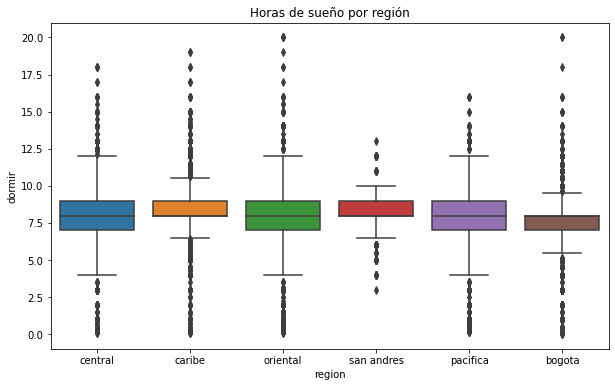

In [345]:
# Graficar cuánto duerme cada región en un boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_depurada['region'], y=data_depurada['dormir'])
plt.title('Horas de sueño por región')
plt.show()

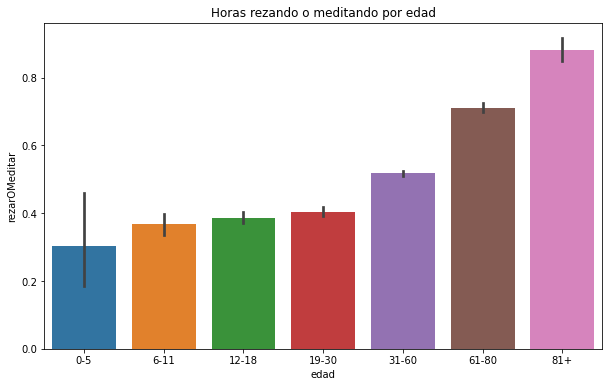

In [346]:
# Graficar cuánto tiempo dedica cada grupo etario a rezar o meditar en un gráfico de barras (debemos ordenar los grupos etarios de menor a mayor)

plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['edad'], y=data_depurada['rezarOMeditar'], order=['0-5', '6-11', '12-18', '19-30', '31-60', '61-80', '81+'])
plt.title('Horas rezando o meditando por edad')

plt.show()

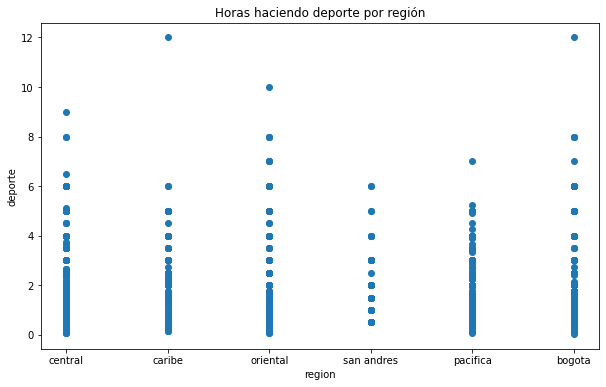

In [347]:
# Se grafica el tiempo que dedica cada región a hacer deporte en un scatterplot 

plt.figure(figsize=(10,6))
plt.scatter(data_depurada['region'], data_depurada['deporte'])
plt.title('Horas haciendo deporte por región')
plt.xlabel('region')
plt.ylabel('deporte')
plt.show()

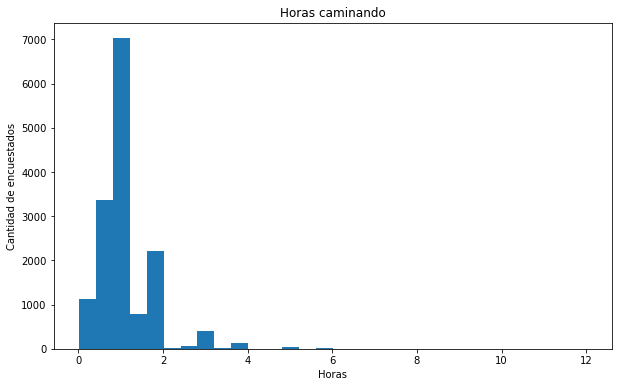

In [348]:
# Graficar cuántas personas caminan cada número de horas en un histograma

plt.figure(figsize=(10,6))
plt.hist(data_depurada['caminar'], bins=30)
plt.title('Horas caminando')
plt.xlabel('Horas')
plt.ylabel('Cantidad de encuestados')
plt.show()

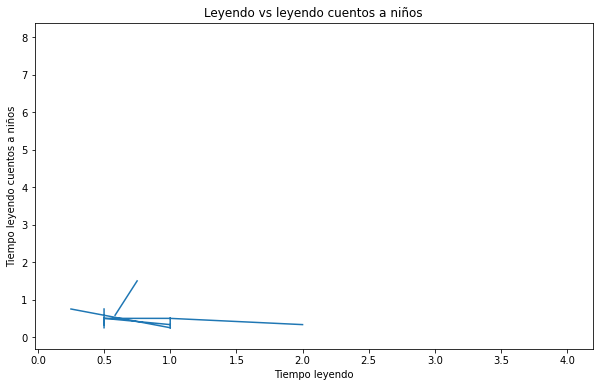

In [349]:
# Se grafica la relación entre leer y leer cuentos a niños (como son dos variables dependientes, vemos que la gráfica no dice mucho)

plt.figure(figsize=(10,6))
plt.plot(data_depurada['leer'], data_depurada['cuentosNino'])
plt.title('Leyendo vs leyendo cuentos a niños')
plt.xlabel('Tiempo leyendo')
plt.ylabel('Tiempo leyendo cuentos a niños')
plt.show()

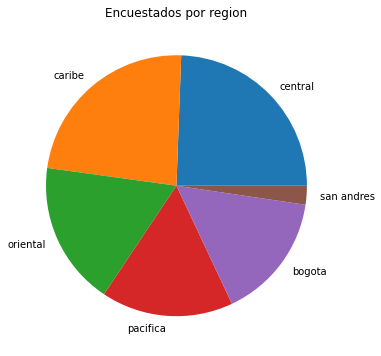

In [350]:
# Se grafica la cantidad de encuestados por región en un gráfico de pastel

plt.figure(figsize=(10,6))
plt.pie(data_depurada['region'].value_counts(), labels=data_depurada['region'].value_counts().index)
plt.title('Encuestados por region')
plt.show()

Para efectos de buscar patrones y tendencias, la gráfica de barras muestra la información con la mayor claridad.

### 3.2 Identificación de tendencias

#### Actividades que disminuyen a medida que el estrato aumenta:

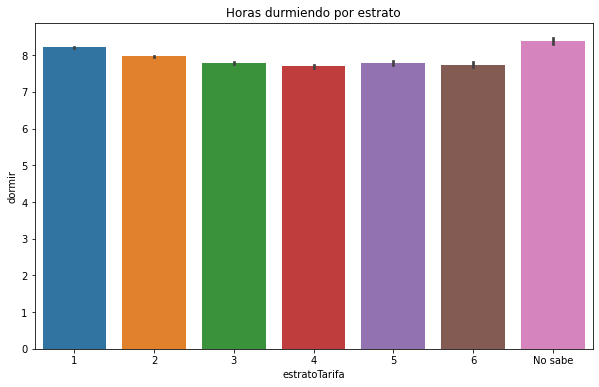

In [351]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['dormir'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas durmiendo por estrato')
plt.show()

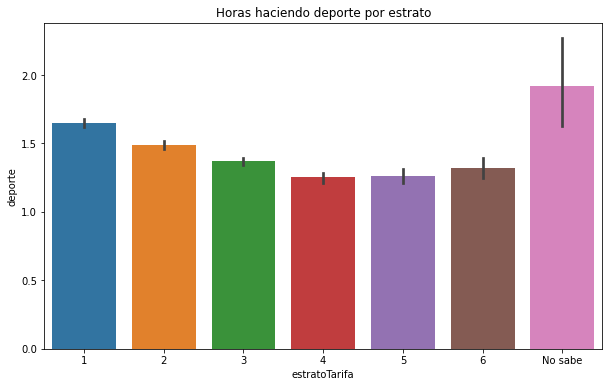

In [352]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['deporte'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas haciendo deporte por estrato')
plt.show()

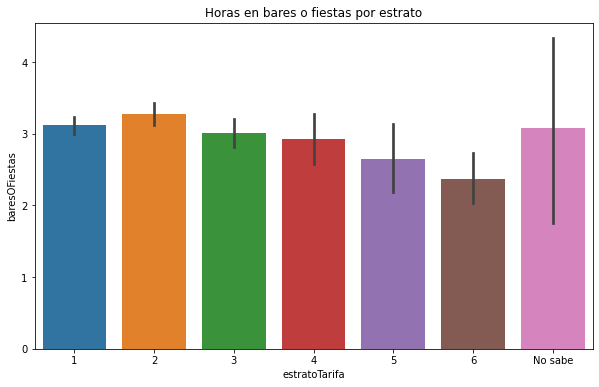

In [353]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['baresOFiestas'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas en bares o fiestas por estrato')
plt.show()

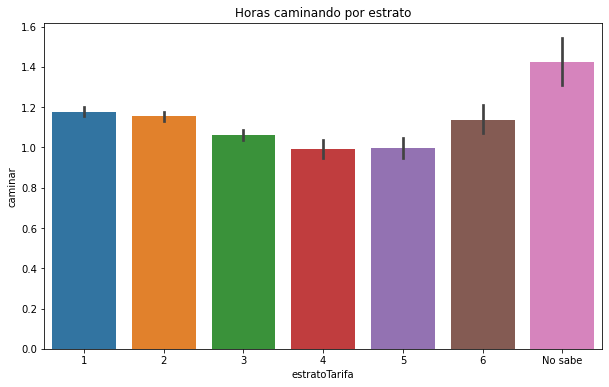

In [354]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['caminar'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas caminando por estrato')
plt.show()

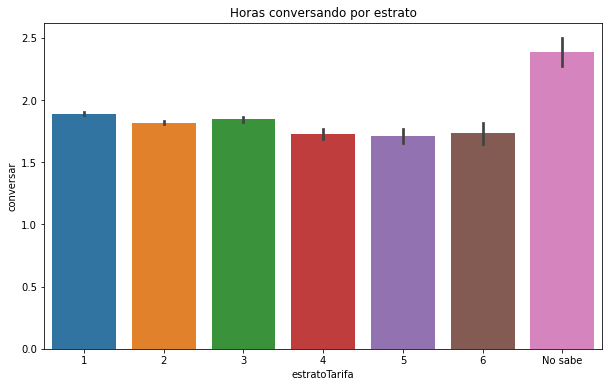

In [355]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['conversar'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas conversando por estrato')
plt.show()

#### Actividades que disminuyen a medida que la conexión a internet aumenta:

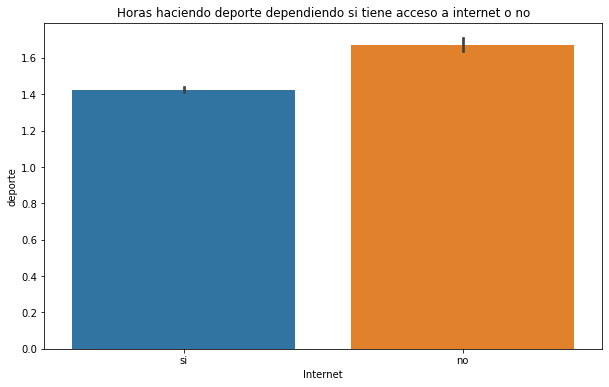

In [356]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['deporte'])
plt.title('Horas haciendo deporte dependiendo si tiene acceso a internet o no')
plt.show()

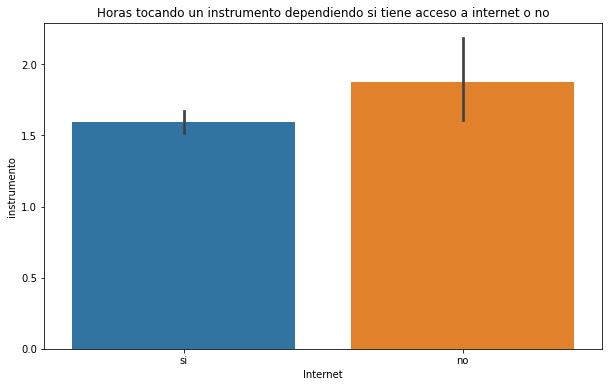

In [357]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['instrumento'])
plt.title('Horas tocando un instrumento dependiendo si tiene acceso a internet o no')
plt.show()

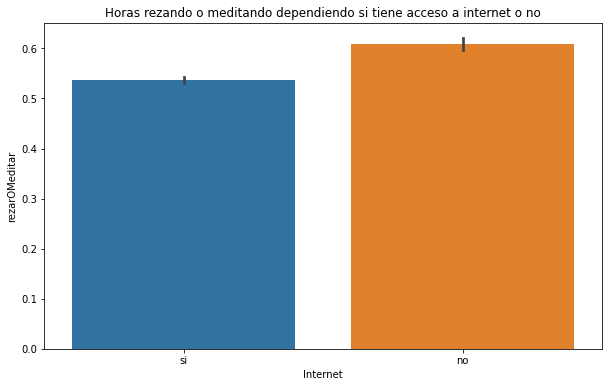

In [358]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['rezarOMeditar'])
plt.title('Horas rezando o meditando dependiendo si tiene acceso a internet o no')
plt.show()

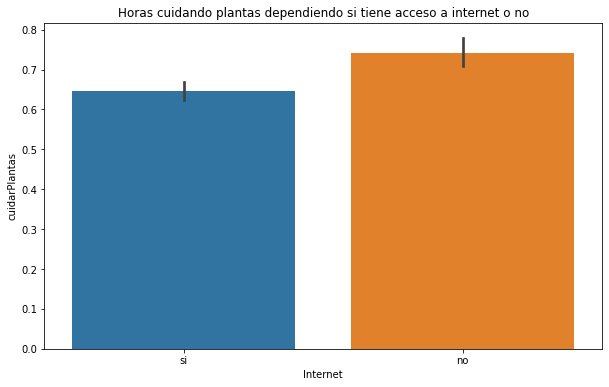

In [359]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['cuidarPlantas'])
plt.title('Horas cuidando plantas dependiendo si tiene acceso a internet o no')
plt.show()

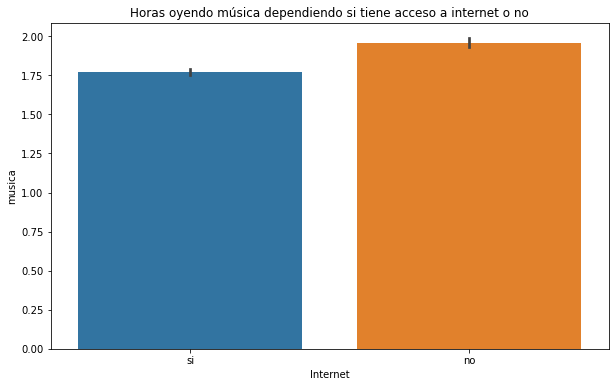

In [360]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['musica'])
plt.title('Horas oyendo música dependiendo si tiene acceso a internet o no')
plt.show()

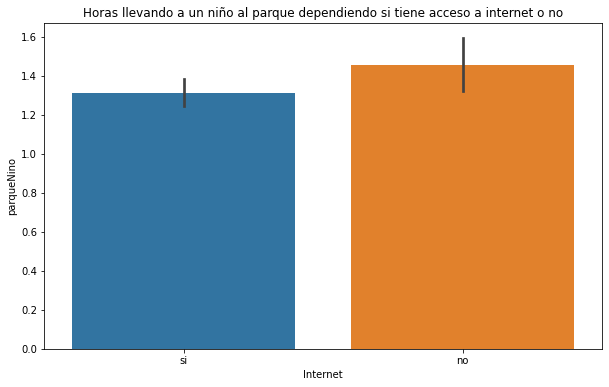

In [361]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['parqueNino'])
plt.title('Horas llevando a un niño al parque dependiendo si tiene acceso a internet o no')
plt.show()

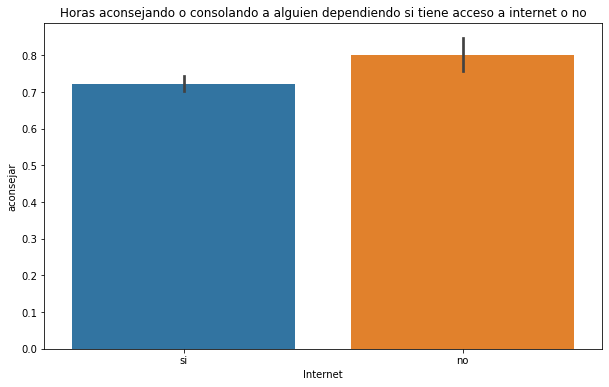

In [362]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['aconsejar'])
plt.title('Horas aconsejando o consolando a alguien dependiendo si tiene acceso a internet o no')
plt.show()

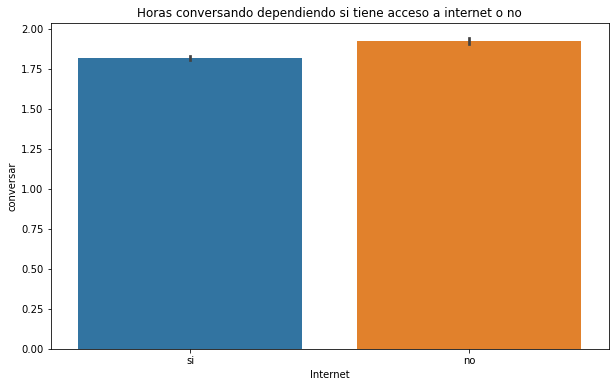

In [363]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['conversar'])
plt.title('Horas conversando dependiendo si tiene acceso a internet o no')
plt.show()

#### Tendencias que contradicen estereotipos populares:

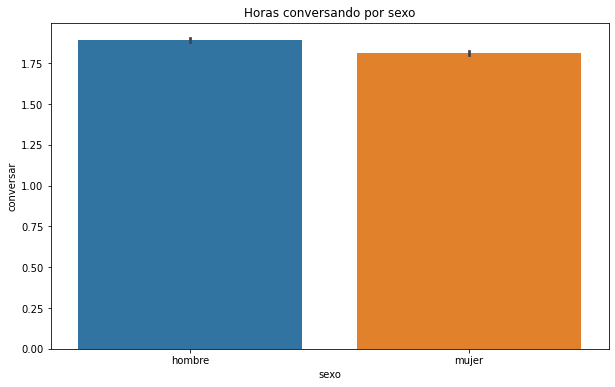

In [364]:
# Va contra el estereotipo de que las mujeres hablan mucho
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['sexo'], y=data_depurada['conversar'])
plt.title('Horas conversando por sexo')
plt.show()

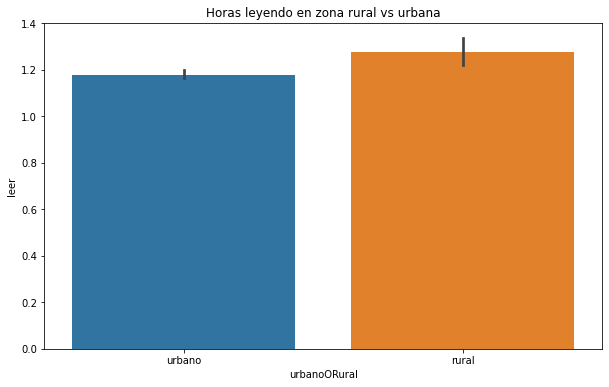

In [365]:
# Va contra el estereotipo de que la gente en el campo no lee
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['urbanoORural'], y=data_depurada['leer'])
plt.title('Horas leyendo en zona rural vs urbana')
plt.show()

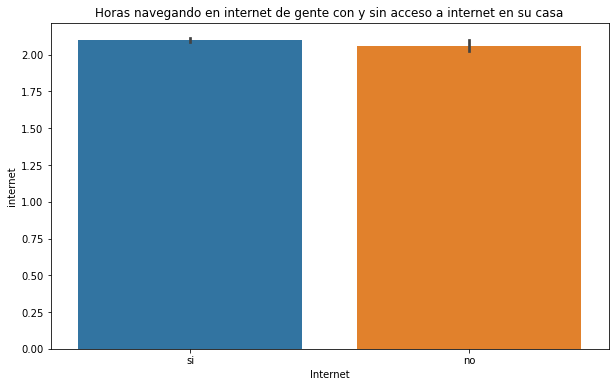

In [366]:
# La gente con y sin interenet en la casa parece navegar en internet el mismo tiempof
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['internet'])
plt.title('Horas navegando en internet de gente con y sin acceso a internet en su casa')
plt.show()

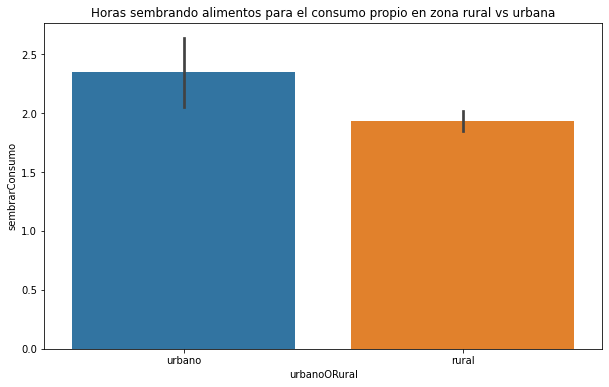

In [367]:
# Va contra el estereotipo de que en el campo se siembre su propia comida más que en la ciudad

plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['urbanoORural'], y=data_depurada['sembrarConsumo'])
plt.title('Horas sembrando alimentos para el consumo propio en zona rural vs urbana')
plt.show()

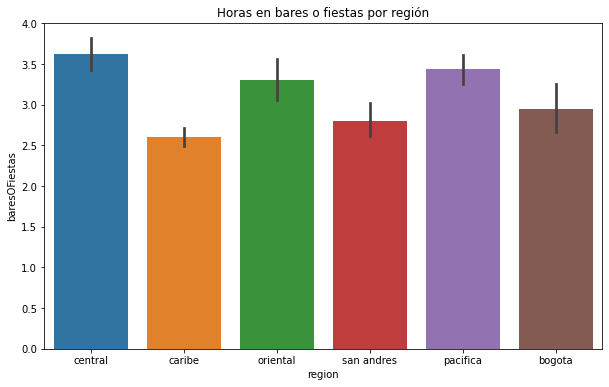

In [368]:
# Va contra el estereotipo de que los costeños son muy rumberos
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['baresOFiestas'])
plt.title('Horas en bares o fiestas por región')
plt.show()

#### Cosas que se hacen/dejan de hacer en Bogotá:

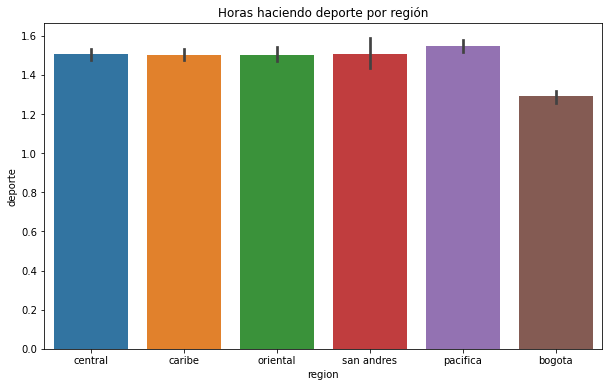

In [369]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['deporte'])
plt.title('Horas haciendo deporte por región')
plt.show()

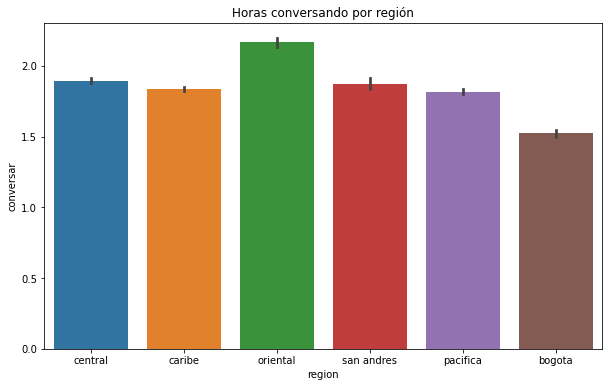

In [370]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['conversar'])
plt.title('Horas conversando por región')
plt.show()

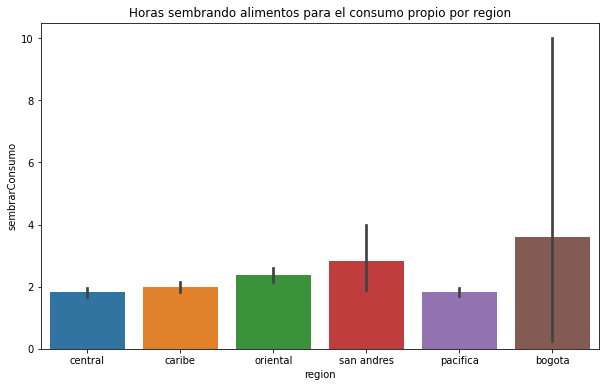

In [371]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['sembrarConsumo'])
plt.title('Horas sembrando alimentos para el consumo propio por region')
plt.show()

#### Privilegios de clase:

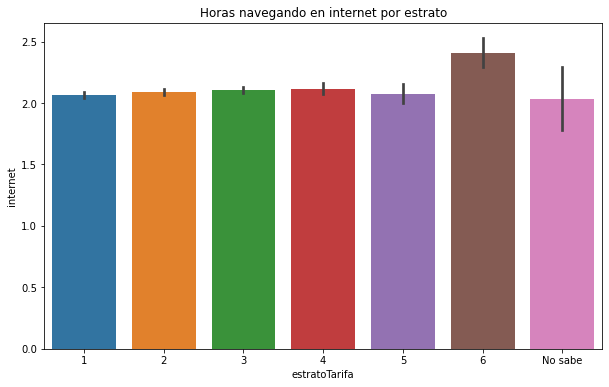

In [372]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['internet'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas navegando en internet por estrato')
plt.show()

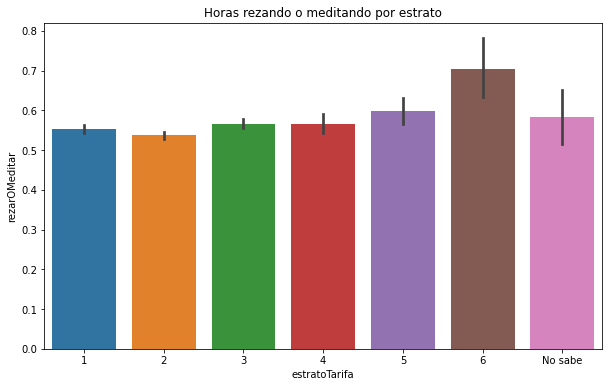

In [373]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['rezarOMeditar'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas rezando o meditando por estrato')
plt.show()

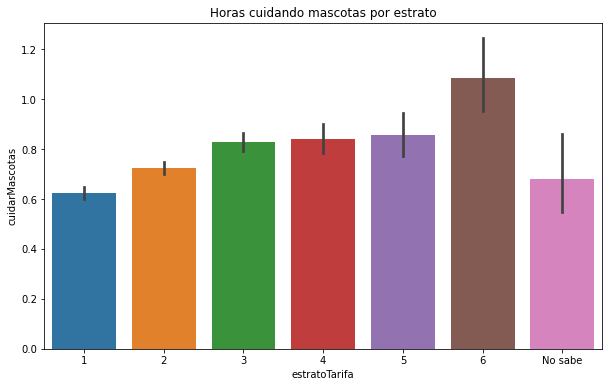

In [374]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['cuidarMascotas'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas cuidando mascotas por estrato')
plt.show()

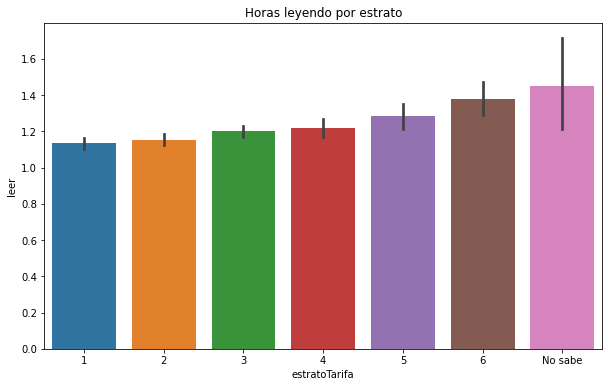

In [375]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['leer'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas leyendo por estrato')
plt.show()

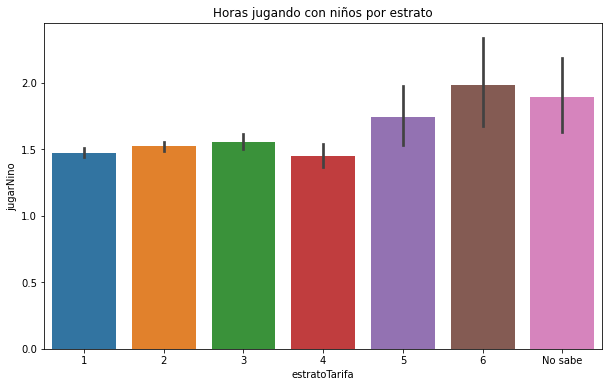

In [376]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['jugarNino'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas jugando con niños por estrato')
plt.show()

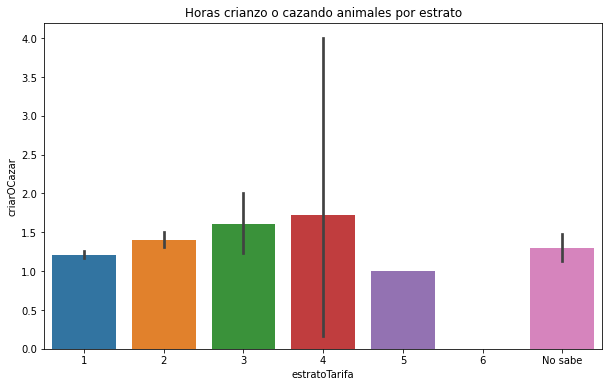

In [377]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['criarOCazar'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas crianzo o cazando animales por estrato')
plt.show()

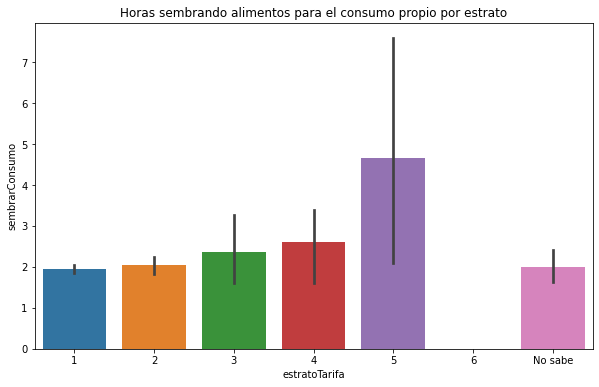

In [378]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['sembrarConsumo'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Horas sembrando alimentos para el consumo propio por estrato')
plt.show()

#### Comportamientos atípicos del grupo étnico rom:

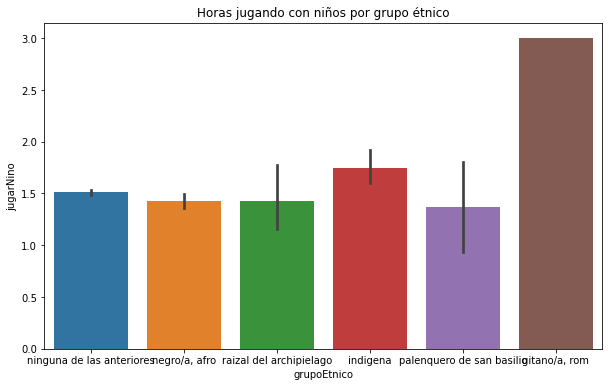

In [379]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['grupoEtnico'], y=data_depurada['jugarNino'])
plt.title('Horas jugando con niños por grupo étnico')
plt.show()

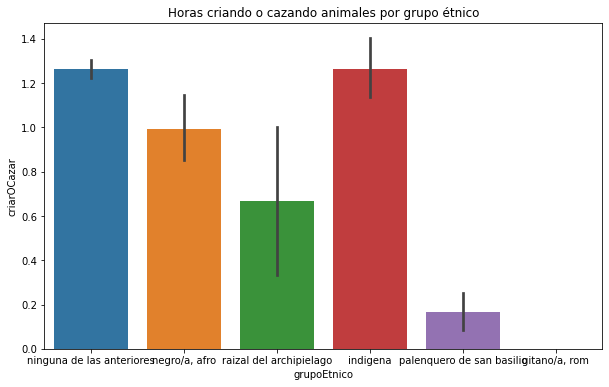

In [380]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['grupoEtnico'], y=data_depurada['criarOCazar'])
plt.title('Horas criando o cazando animales por grupo étnico')
plt.show()

In [381]:
# Se obtiene cuántos encuestados rom hay por región
 
data_depurada[data_depurada['grupoEtnico'] == 'gitano/a, rom']['region'].value_counts()


central       6
pacifica      6
caribe        2
oriental      2
bogota        1
san andres    1
Name: region, dtype: int64

Tras ver que solo hay 18 encuestados que se identifican como rom (dentro de los casi 130 mil encuestados), se concluye que no es una muestra significativa.

#### Comportamientos atípicos de la población de San Andrés:

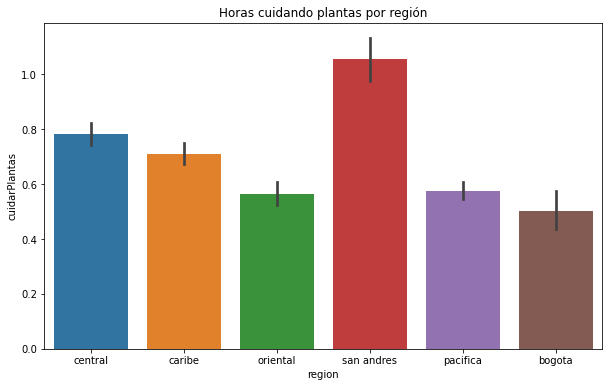

In [382]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['cuidarPlantas'])
plt.title('Horas cuidando plantas por región')
plt.show()

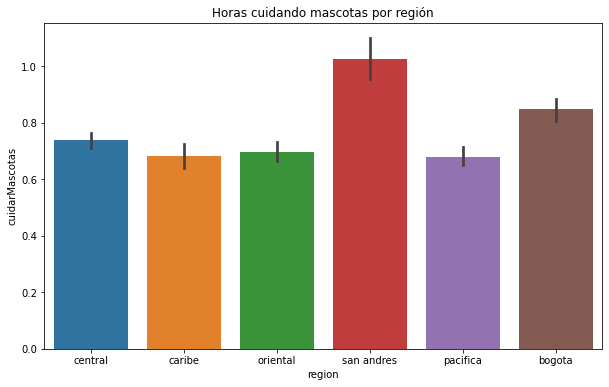

In [383]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['cuidarMascotas'])
plt.title('Horas cuidando mascotas por región')
plt.show()

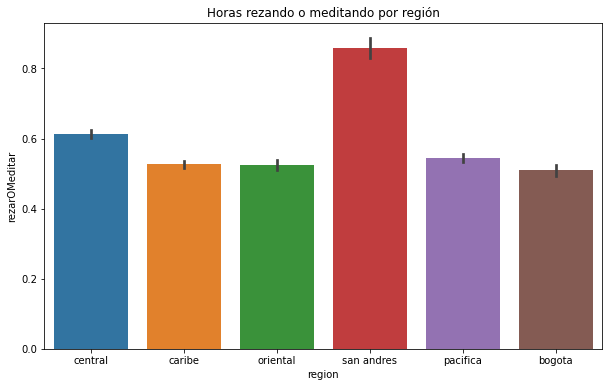

In [384]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['rezarOMeditar'])
plt.title('Horas rezando o meditando por región')
plt.show()

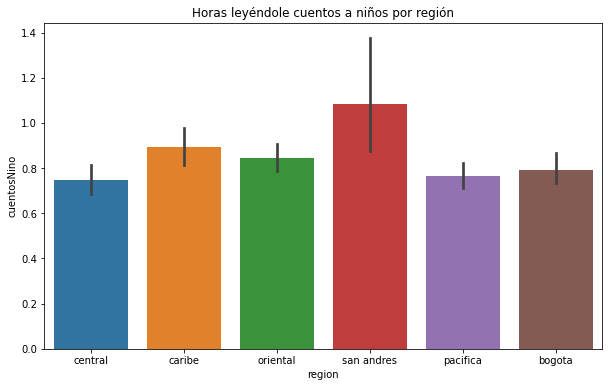

In [385]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['cuentosNino'])
plt.title('Horas leyéndole cuentos a niños por región')
plt.show()

In [386]:
# Se obtiene la cantidad de encuestados que viven en San Andrés

data_depurada['region'].value_counts()

central       31472
caribe        30170
oriental      22955
pacifica      21089
bogota        20204
san andres     3006
Name: region, dtype: int64

Se concluye que la muestra de encuestados que viven en San Andrés corresponde a una proporción similar a la de habitantes de la isla frente a la población colombiana.

#### Cambios interesantes en la relación con la naturaleza con vs sin internet:

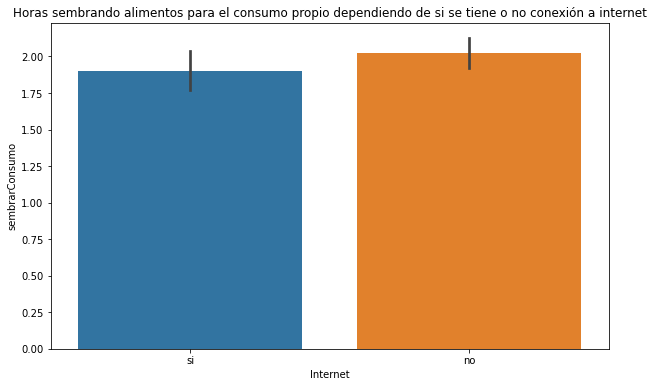

In [387]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['sembrarConsumo'])
plt.title('Horas sembrando alimentos para el consumo propio dependiendo de si se tiene o no conexión a internet')
plt.show()

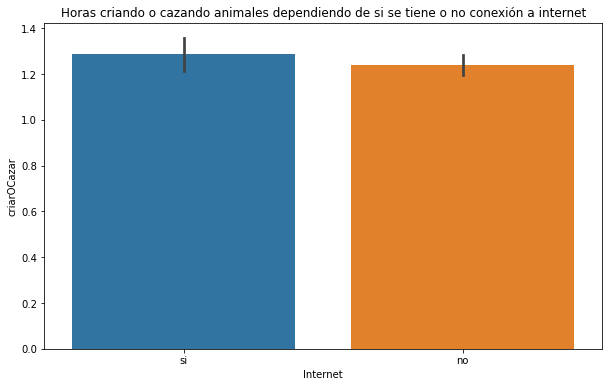

In [388]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['criarOCazar'])
plt.title('Horas criando o cazando animales dependiendo de si se tiene o no conexión a internet')
plt.show()

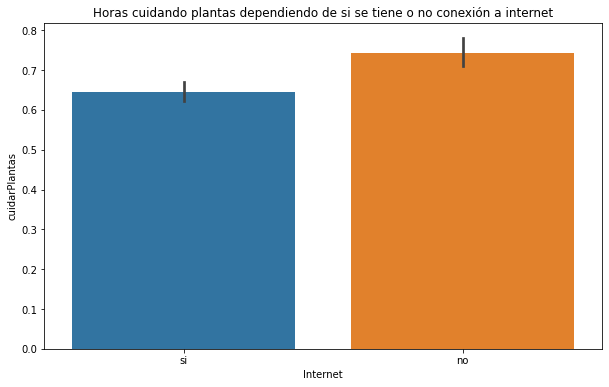

In [389]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['cuidarPlantas'])
plt.title('Horas cuidando plantas dependiendo de si se tiene o no conexión a internet')
plt.show()

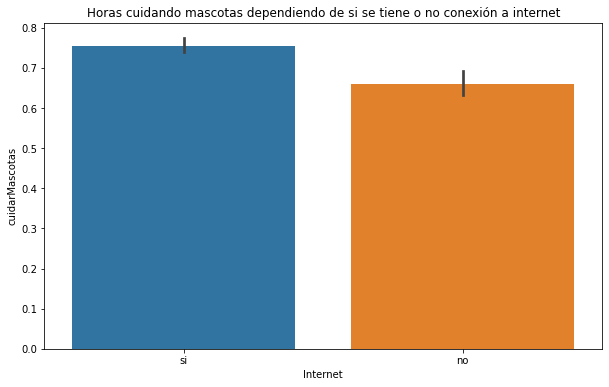

In [390]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['cuidarMascotas'])
plt.title('Horas cuidando mascotas dependiendo de si se tiene o no conexión a internet')
plt.show()

#### Fenómenos por edad:

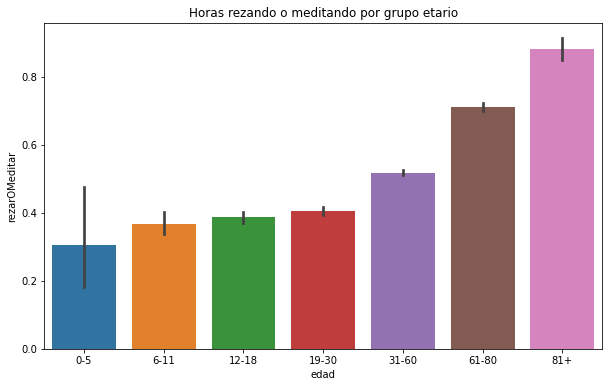

In [391]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['edad'], y=data_depurada['rezarOMeditar'], order=['0-5', '6-11', '12-18', '19-30', '31-60', '61-80', '81+'])
plt.title('Horas rezando o meditando por grupo etario')
plt.show()

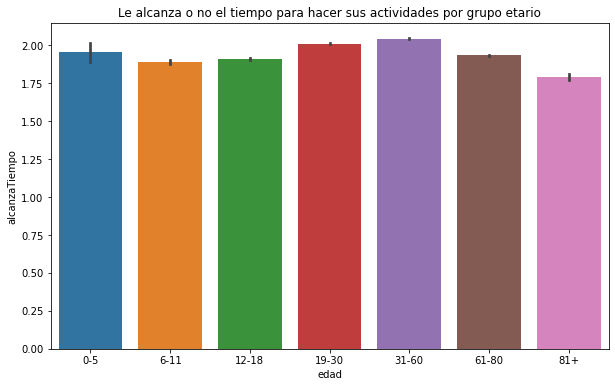

In [392]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['edad'], y=data_depurada['alcanzaTiempo'], order=['0-5', '6-11', '12-18', '19-30', '31-60', '61-80', '81+'])
plt.title('Le alcanza o no el tiempo para hacer sus actividades por grupo etario')
plt.show()

### Al final, la percepción del tiempo es muy similar entre todos los grupos: (narrativa que buscamos contar)

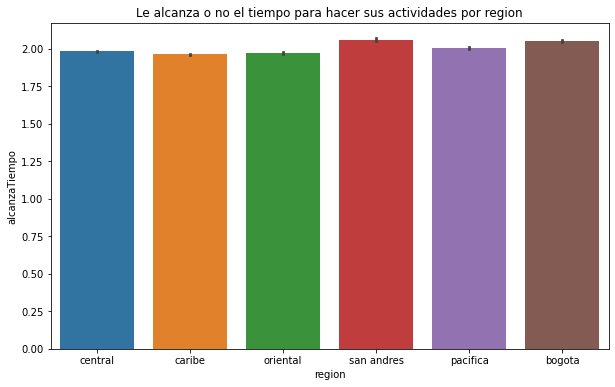

In [393]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['region'], y=data_depurada['alcanzaTiempo'])
plt.title('Le alcanza o no el tiempo para hacer sus actividades por region')
plt.show()

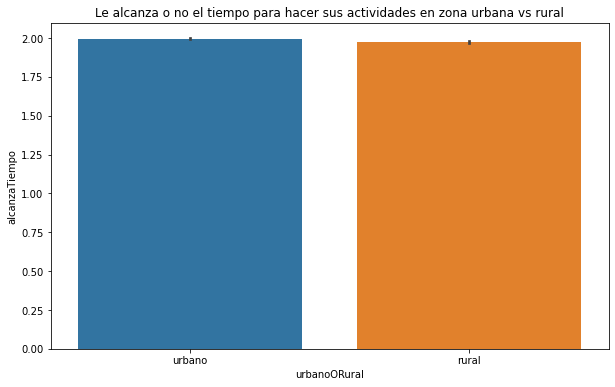

In [394]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['urbanoORural'], y=data_depurada['alcanzaTiempo'])
plt.title('Le alcanza o no el tiempo para hacer sus actividades en zona urbana vs rural')
plt.show()

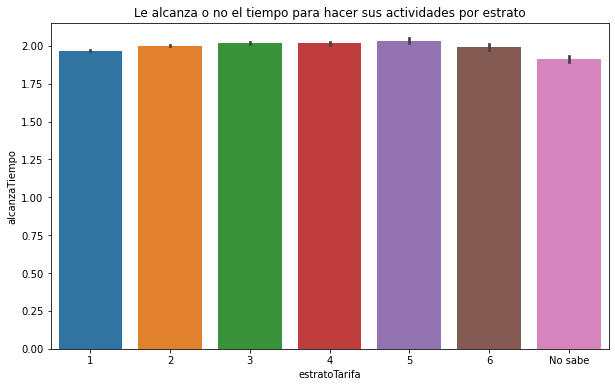

In [395]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['estratoTarifa'], y=data_depurada['alcanzaTiempo'], order=[1, 2, 3, 4, 5, 6, 'No sabe'])
plt.title('Le alcanza o no el tiempo para hacer sus actividades por estrato')
plt.show()

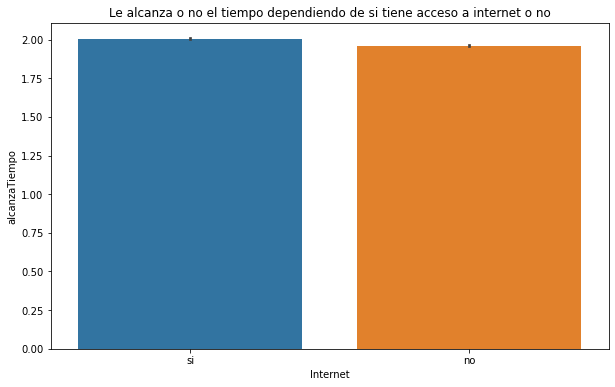

In [396]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['Internet'], y=data_depurada['alcanzaTiempo'])
plt.title('Le alcanza o no el tiempo dependiendo de si tiene acceso a internet o no')
plt.show()

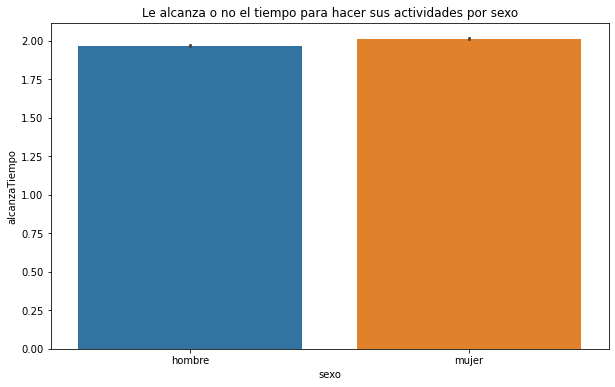

In [397]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['sexo'], y=data_depurada['alcanzaTiempo'])
plt.title('Le alcanza o no el tiempo para hacer sus actividades por sexo')
plt.show()

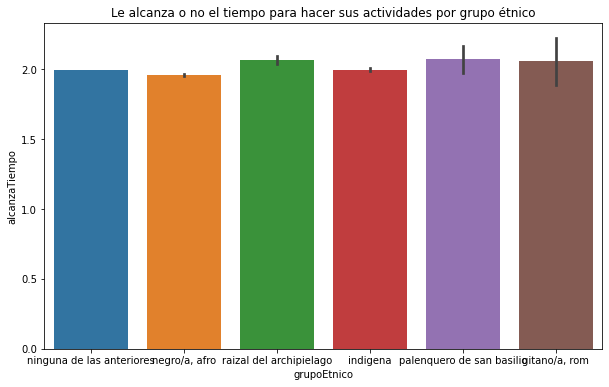

In [398]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_depurada['grupoEtnico'], y=data_depurada['alcanzaTiempo'])
plt.title('Le alcanza o no el tiempo para hacer sus actividades por grupo étnico')
plt.show()

## 4 Fase predictiva (en caso de ser necesitada)

In [399]:
# Se crea un modelo de regresión lineal para predecir las horas de sueño (no será utilizado por el momento)

'''
# Se separa el conjunto de datos en entrenamiento y test
X = data_depurada[['edad', 'sexo', 'grupoEtnico', 'region', 'urbanoORural', 'estratoTarifa', 'Internet']]
y = data_depurada['dormir']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se crea un modelo de regresión lineal
reg = LinearRegression()

# Se entrena el modelo
reg.fit(X_train, y_train)

# Se realizan las predicciones
y_pred = reg.predict(X_test)

# Se calculan las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
'''

"\n# Se separa el conjunto de datos en entrenamiento y test\nX = data_depurada[['edad', 'sexo', 'grupoEtnico', 'region', 'urbanoORural', 'estratoTarifa', 'Internet']]\ny = data_depurada['dormir']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Se crea un modelo de regresión lineal\nreg = LinearRegression()\n\n# Se entrena el modelo\nreg.fit(X_train, y_train)\n\n# Se realizan las predicciones\ny_pred = reg.predict(X_test)\n\n# Se calculan las métricas\nmse = mean_squared_error(y_test, y_pred)\nmae = mean_absolute_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\n\nprint(f'MSE: {mse}')\nprint(f'MAE: {mae}')\nprint(f'R2: {r2}')\n"